# Perceptron

Perceptron é uma rede neural de camada única e um Perceptron de várias camadas é chamado de Rede Neural Artificial. O Perceptron é um classificador linear (binário). Além disso, é usado na aprendizagem supervisionada e pode ser usado para classificar os dados de entrada fornecidos.

Considerando o classificador Perceptron discutido na disciplina, realizamos o treinamento do Perceptron e plotamos os dados para cada um dos <a href="https://github.com/daniloaldm/RNA/tree/main/atv1/dados">datasets fornecidos</a>, que possuiam amostras de treinamento para problemas de classificação binária com X = R² e Y = {−1, 1}.

Os dados estão na forma de

um arquivo de texto com três colunas:

1. Coluna 1: atributo numérico 1 (x1);
2. Coluna 2: atributo numérico 2 (x2);
3. Coluna 3: classe (y).


### Bibliotecas

In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt

### Arquivo com o dataset

In [14]:
FILE = "dados/data_xor.dat"

### Funções de ativação

In [15]:
def sign(alfa):
    if alfa <= 0:
        return -1
    else:
        return 1

def logistic(alfa):
    return 1 / 1 + math.exp(-alfa)

def tanh(alfa):
    return (math.exp(2 * alfa) - 1) / (math.exp(2 * alfa) + 1)

def relu(alfa):
    if alfa <= 0:
        return 0
    else:
        return alfa

### Funções auxiliares:

##### Função que calcula o produto interno de dois vetores

In [16]:
def inner_product(v1, v2):
    result = 0
    for i in range(len(v1)):
        result += float(v1[i]) * float(v2[i])
    return result

##### Função que multiplica um elemento por um vetor

In [17]:
def product(e, v):
    result = []
    for i in range(len(v)):
        x = float(e) * float(v[i])
        result.append(x)
    return result

##### Função que soma dois vetores

In [18]:
def sum(v1, v2):
    result = []
    for i in range(len(v1)):
        x = float(v1[i]) + float(v2[i])
        result.append(x)
    return result

##### Função que calcula a porcentagem de similaridade entre dois vetores 

In [19]:
def score(v1, v2):
    hits = 0
    for i in range(len(v1)):
        if(float(v1[i]) == float(v2[i])):
            hits += 1
    return hits/len(v1)

##### Insere uma coluna de values no início da matriz

In [20]:
def add_value_column_matriz(matriz, value):
    for i in range(len(matriz)):
        matriz[i].insert(0, value)

### Coletando os dados de entada X e y

In [21]:
X = []
y = []

arq_address = FILE
f = open(arq_address,"r")
row = f.readline().replace('\n','')
while row:
    columns = row.split(" ")
    # guardando todas as colunas, menos a última (predição)
    X.append(columns[:len(columns) - 1])
    # guardando a última coluna (predição)
    y.append(columns[-1])
    row = f.readline().replace('\n', '')
f.close()

# adicionando coluna de 1's em X (como a primeira coluna)
add_value_column_matriz(X, 1)

### Pesos de conexão

In [22]:
W = []
bies = 0
# para cada coluna (feature), adiciono pesos Wi
for i in range(len(X[0])):
    if(i == 0):
        W.append(bies) 
    else:
        W.append(0) # pode ser randomizado (intervalor de -1 até 1, por exemplo)

### Efetuando o treinamento do Perceptron

##### Função de treinamento do perceptron:

### <img width="600" src="imagens/algoritmo_perceptron.jpeg">

##### Treinamento do perceptron no código:

In [23]:
# predições treinadas
y_train = []
# número de iterações t do treinamento
T = 200
for t in range(T):
    # guardara as predições em treinamento
    y_training = []

    # percorre todas as predições (vetor y)
    for n in range(len(y)):
        # calculando a predição do perceptron aplicando a função de ativação
        yn = sign(inner_product(W, X[n]))

        # averiguando se houve erro de classificação para aplicar a correção
        if y[n] != yn:
            W = sum(W, product(y[n], X[n]))

        y_training.append(yn)
    
    # atualizando as predições
    y_train = y_training
# --------------------------------------------------------------------------

### Plotagem da superfície de decisão (dados + hiperplano)

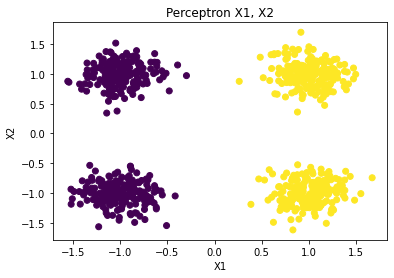

In [24]:
data = pd.read_csv(FILE, delimiter="\s+", header=None, engine='python')
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2, c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron X1, X2')
plt.show()

### Acerto(%) das predições treinadas em relação as reais usadas para o treino

In [25]:
print("score:", score(y_train, y))

score: 0.5
